## **Breast Cancer Wisconsin (Diagnostic) Data Set**
## **Predict whether the cancer is benign or malignant**

<h2 align="center">Benign VS Malignant FNA</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/SMEAR.png">



In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [0]:
PATH = 'https://raw.githubusercontent.com/brianfarrelly/data/master/epilepsy.csv'

breast_data = pd.read_csv(PATH)

breast_data.info()
breast_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
breast_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [0]:
len(breast_data)

569

In [0]:
breast_data.radius_mean.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

In [0]:
stats.shapiro(breast_data['radius_mean'])

(0.9410696029663086, 3.1061551985026026e-14)

In [0]:
stats.shapiro(breast_data['texture_mean'])

(0.9767200946807861, 7.281473557441132e-08)

In [0]:
stats.shapiro(breast_data['perimeter_mean'])

(0.9361826181411743, 7.01163031715385e-15)

(0.9410696029663086, 3.1061551985026026e-14)
(0.9767200946807861, 7.281473557441132e-08)
(0.9361826181411743, 7.01163031715385e-15)
(0.8584018349647522, 3.196511088521129e-22)
(0.987487256526947, 8.59934589243494e-05)
(0.9169784784317017, 3.967941392408286e-17)
DescribeResult(nobs=569, minmax=(6.981, 28.11), mean=14.127291739894552, variance=12.418920129526722, skewness=0.9398934455576345, kurtosis=0.8275836739140465)
DescribeResult(nobs=569, minmax=(9.71, 39.28), mean=19.289648506151142, variance=18.49890867905146, skewness=0.6487335672867015, kurtosis=0.74114542022429)
DescribeResult(nobs=569, minmax=(43.79, 188.5), mean=91.96903339191564, variance=590.4404795217704, skewness=0.9880369541677213, kurtosis=0.9531650486734948)
DescribeResult(nobs=569, minmax=(143.5, 2501.0), mean=654.8891036906855, variance=123843.55431768115, skewness=1.6413905092044112, kurtosis=3.609761264823108)
DescribeResult(nobs=569, minmax=(0.052629999999999996, 0.1634), mean=0.09636028119507908, variance=0.0001

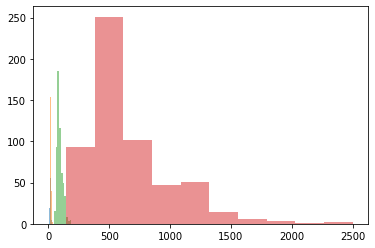

In [0]:
'''
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
'''

plt.hist(breast_data['radius_mean'], alpha = .5)
plt.hist(breast_data['texture_mean'], alpha = .5)
plt.hist(breast_data['perimeter_mean'], alpha = .5)
plt.hist(breast_data['area_mean'], alpha = .5)
plt.hist(breast_data['smoothness_mean'], alpha = .5)
plt.hist(breast_data['compactness_mean'], alpha = .5)


# Remember that Shapiro test is sensitive to large samples. 

print(stats.shapiro(breast_data['radius_mean']))
print(stats.shapiro(breast_data['texture_mean']))
print(stats.shapiro(breast_data['perimeter_mean']))
print(stats.shapiro(breast_data['area_mean']))
print(stats.shapiro(breast_data['smoothness_mean']))
print(stats.shapiro(breast_data['compactness_mean']))


print(stats.describe(breast_data['radius_mean']))
print(stats.describe(breast_data['texture_mean']))
print(stats.describe(breast_data['perimeter_mean']))
print(stats.describe(breast_data['area_mean']))
print(stats.describe(breast_data['smoothness_mean']))
print(stats.describe(breast_data['compactness_mean']))


In [0]:
breast_data_M = breast_data[breast_data['diagnosis']== 'M']

breast_data_B = breast_data[breast_data['diagnosis']== 'B']


In [0]:
breast_data_M.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
breast_data_B.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN


In [0]:
print(stats.describe(breast_data_M['radius_mean']))
print(stats.describe(breast_data_M['texture_mean']))
print(stats.describe(breast_data_M['perimeter_mean']))
print(stats.describe(breast_data_M['area_mean']))
print(stats.describe(breast_data_M['smoothness_mean']))
print(stats.describe(breast_data_M['compactness_mean']))


DescribeResult(nobs=212, minmax=(10.95, 28.11), mean=17.462830188679245, variance=10.26543081462935, skewness=0.4983438269401485, kurtosis=0.33744620499587263)
DescribeResult(nobs=212, minmax=(10.38, 39.28), mean=21.60490566037736, variance=14.284392882053115, skewness=0.6985549130264693, kurtosis=2.2951980794284896)
DescribeResult(nobs=212, minmax=(71.9, 188.5), mean=115.36537735849056, variance=477.6258704730394, skewness=0.6006419795948119, kurtosis=0.5492077385280698)
DescribeResult(nobs=212, minmax=(361.6, 2501.0), mean=978.3764150943397, variance=135378.3553652866, skewness=1.109744551210065, kurtosis=2.223843454774964)
DescribeResult(nobs=212, minmax=(0.07371, 0.1447), mean=0.10289849056603775, variance=0.00015896760245014756, skewness=0.47635014569633943, kurtosis=0.39364362969008315)
DescribeResult(nobs=212, minmax=(0.04605, 0.3454), mean=0.14518778301886792, variance=0.002914649622075919, skewness=0.8308358737560376, kurtosis=0.8069822094661272)


In [0]:
print(stats.describe(breast_data_B['radius_mean']))
print(stats.describe(breast_data_B['texture_mean']))
print(stats.describe(breast_data_B['perimeter_mean']))
print(stats.describe(breast_data_B['area_mean']))
print(stats.describe(breast_data_B['smoothness_mean']))
print(stats.describe(breast_data_B['compactness_mean']))


DescribeResult(nobs=357, minmax=(6.981, 17.85), mean=12.146523809523808, variance=3.1702217220438738, skewness=-0.08344660198964896, kurtosis=-0.028871551594101152)
DescribeResult(nobs=357, minmax=(9.71, 33.81), mean=17.914761904761903, variance=15.961020518994113, skewness=0.9772157090288104, kurtosis=1.1858758625694934)
DescribeResult(nobs=357, minmax=(43.79, 114.6), mean=78.075406162465, variance=139.41558220816415, skewness=-0.06441193810264673, kurtosis=-0.03299354965402257)
DescribeResult(nobs=357, minmax=(143.5, 992.1), mean=462.7901960784313, variance=18033.030100242344, skewness=0.34082567025503224, kurtosis=0.28842005191069164)
DescribeResult(nobs=357, minmax=(0.052629999999999996, 0.1634), mean=0.09247764705882354, variance=0.00018079699557171184, skewness=0.6606569651429229, kurtosis=1.8127514259330137)
DescribeResult(nobs=357, minmax=(0.01938, 0.2239), mean=0.0800846218487395, variance=0.0011390594350391844, skewness=1.2073423229699785, kurtosis=2.2378608428783586)


In [0]:
stats.ttest_ind(breast_data_M['radius_mean'], breast_data_B['radius_mean'])


Ttest_indResult(statistic=25.435821610057054, pvalue=8.465940572262422e-96)

In [0]:
stats.ttest_ind(breast_data_M['texture_mean'], breast_data_B['texture_mean'])


Ttest_indResult(statistic=10.86720108146434, pvalue=4.0586360478980736e-25)

In [0]:
stats.kruskal(breast_data_M['texture_mean'], breast_data_B['texture_mean'])


KruskalResult(statistic=121.22093055992241, pvalue=3.418605714119009e-28)

In [0]:
stats.ttest_ind(breast_data_M['area_mean'], breast_data_B['area_mean'])

Ttest_indResult(statistic=23.938687235690992, pvalue=4.734564310307344e-88)

In [0]:
stats.ttest_ind(breast_data_M['smoothness_mean'], breast_data_B['smoothness_mean'])


Ttest_indResult(statistic=9.146098808149038, pvalue=1.0518503592032013e-18)

In [0]:
stats.ttest_ind(breast_data['chol'], breast_data['trestbps'])


Ttest_indResult(statistic=36.46965344286737, pvalue=8.976425620419022e-155)

In [0]:
breast_data_M = breast_data[breast_data['sex']==1]

breast_data_F = breast_data[breast_data['sex']==0]


In [0]:
breast_data_M.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


In [0]:
print(stats.describe(breast_data_M['target']))
print(stats.describe(breast_data_F['target']))

DescribeResult(nobs=207, minmax=(0, 1), mean=0.4492753623188406, variance=0.2486281131279021, skewness=0.20395079136182256, kurtosis=-1.9584040747028864)
DescribeResult(nobs=96, minmax=(0, 1), mean=0.75, variance=0.18947368421052632, skewness=-1.1547005383792515, kurtosis=-0.6666666666666665)


In [0]:
heart_healthy = heart_data[heart_data['target']==1]

heart_disease = heart_data[heart_data['target']==0]


In [0]:
heart_healthy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


In [0]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


In [0]:
len(heart_healthy)

165

In [0]:
len(heart_disease)

138

In [0]:
print(stats.describe(heart_healthy['target']))
print(stats.describe(heart_disease['target']))

DescribeResult(nobs=165, minmax=(1, 1), mean=1.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
DescribeResult(nobs=138, minmax=(0, 0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


In [0]:
print(stats.describe(heart_healthy['chol']))
print(stats.describe(heart_disease['chol']))

DescribeResult(nobs=165, minmax=(126, 564), mean=242.23030303030302, variance=2867.9100517368806, skewness=1.7296855361377506, kurtosis=7.374392134444465)
DescribeResult(nobs=138, minmax=(131, 409), mean=251.08695652173913, variance=2445.758806728023, skewness=0.3129523951358052, kurtosis=0.31842990435273677)


In [0]:
stats.kruskal(
    heart_healthy['chol'],
    heart_disease['chol'])


KruskalResult(statistic=4.4134180185489065, pvalue=0.035657327187054555)

In [0]:
stats.median_test(
    heart_healthy['chol'],
    heart_disease['chol'])


(5.036938986432594, 0.024812296283679192, 240.0, array([[72, 79],
        [93, 59]]))

In [0]:
stats.mannwhitneyu(
    heart_healthy['chol'],
    heart_disease['chol'])


MannwhitneyuResult(statistic=9789.5, pvalue=0.017857591005688223)

In [0]:
print(stats.describe(heart_healthy['age']))
print(stats.describe(heart_disease['age']))

DescribeResult(nobs=165, minmax=(29, 76), mean=52.4969696969697, variance=91.21492978566148, skewness=0.11984858651650541, kurtosis=-0.6334761098775341)
DescribeResult(nobs=138, minmax=(35, 77), mean=56.60144927536232, variance=63.39474240981699, skewness=-0.5425219384500629, kurtosis=0.08111820394037306)


In [0]:
stats.ttest_ind(heart_healthy['age'], heart_disease['age'])

Ttest_indResult(statistic=-4.014560975148874, pvalue=7.524801303442373e-05)

In [0]:
print(stats.describe(heart_healthy['sex']))
print(stats.describe(heart_disease['sex']))

DescribeResult(nobs=165, minmax=(0, 1), mean=0.5636363636363636, variance=0.24745011086474503, skewness=-0.25663245128736806, kurtosis=-1.934139784946237)
DescribeResult(nobs=138, minmax=(0, 1), mean=0.8260869565217391, variance=0.14471596318629007, skewness=-1.7206180040292134, kurtosis=0.9605263157894743)


In [0]:
stats.kruskal(
    heart_healthy['sex'],
    heart_disease['sex'])


KruskalResult(statistic=23.8354585553072, pvalue=1.0493157073364874e-06)

In [0]:
#stats.median_test(
#    heart_healthy['sex'],
#    heart_disease['sex'])


In [0]:
stats.mannwhitneyu(
    heart_healthy['sex'],
    heart_disease['sex'])


MannwhitneyuResult(statistic=8397.0, pvalue=5.268364336491205e-07)

In [0]:
print(len(heart_healthy['sex'] == 0))
print(len(heart_healthy['sex'] == 1))
print(len(heart_disease['sex'] == 0))
print(len(heart_disease['sex'] == 1))

165
165
138
138


In [0]:
print(stats.describe(heart_healthy['trestbps']))
print(stats.describe(heart_disease['trestbps']))

DescribeResult(nobs=165, minmax=(94, 180), mean=129.3030303030303, variance=261.4563932002956, skewness=0.42067409826984337, kurtosis=0.3493726065290601)
DescribeResult(nobs=138, minmax=(100, 200), mean=134.3985507246377, variance=350.8108008039776, skewness=0.8495084668504913, kurtosis=0.8352775894623741)


In [0]:
stats.ttest_ind(heart_healthy['trestbps'], heart_disease['trestbps'])

Ttest_indResult(statistic=-2.5412927171039, pvalue=0.011546059200233312)

In [0]:
print(stats.describe(heart_healthy['fbs']))
print(stats.describe(heart_disease['fbs']))

DescribeResult(nobs=165, minmax=(0, 1), mean=0.1393939393939394, variance=0.12069475240206945, skewness=2.0822787696329663, kurtosis=2.3358848744641776)
DescribeResult(nobs=138, minmax=(0, 1), mean=0.15942028985507245, variance=0.13498360308896648, skewness=1.860747818792505, kurtosis=1.4623824451410652)


In [0]:
print(stats.describe(heart_healthy['restecg']))
print(stats.describe(heart_disease['restecg']))

DescribeResult(nobs=165, minmax=(0, 2), mean=0.593939393939394, variance=0.25484109386548415, skewness=-0.23961217193547232, kurtosis=-1.5849014324858288)
DescribeResult(nobs=138, minmax=(0, 2), mean=0.4492753623188406, variance=0.293028668147678, skewness=0.6178071855339429, kurtosis=-0.7977656427165738)


In [0]:
print(stats.describe(heart_healthy['thalach']))
print(stats.describe(heart_disease['thalach']))

DescribeResult(nobs=165, minmax=(96, 202), mean=158.46666666666667, variance=367.65284552845526, skewness=-0.7012606169032712, kurtosis=0.41075760014691554)
DescribeResult(nobs=138, minmax=(71, 195), mean=139.1014492753623, variance=510.7049613879192, skewness=-0.2935472748025849, kurtosis=-0.23176522769519403)


In [0]:
stats.ttest_ind(heart_healthy['thalach'], heart_disease['thalach'])

Ttest_indResult(statistic=8.069702869452568, pvalue=1.697337638656049e-14)

In [0]:
print(stats.describe(heart_healthy['exang']))
print(stats.describe(heart_disease['exang']))

DescribeResult(nobs=165, minmax=(0, 1), mean=0.1393939393939394, variance=0.12069475240206945, skewness=2.0822787696329668, kurtosis=2.3358848744641776)
DescribeResult(nobs=138, minmax=(0, 1), mean=0.5507246376811594, variance=0.2492330477097217, skewness=-0.2039507913618228, kurtosis=-1.958404074702886)


In [0]:
stats.kruskal(
    heart_healthy['exang'],
    heart_disease['exang'])


KruskalResult(statistic=57.60853845750365, pvalue=3.198341856280094e-14)

In [0]:
stats.median_test(
    heart_healthy['exang'],
    heart_disease['exang'])

stats.median_test()

(55.944549966650925, 7.45440933123568e-14, 0.0, array([[ 23,  76],
        [142,  62]]))

In [0]:
stats.mannwhitneyu(
    heart_healthy['exang'],
    heart_disease['exang'])


MannwhitneyuResult(statistic=6702.0, pvalue=1.6092032262625598e-14)

In [0]:
print(stats.describe(heart_healthy['ca']))
print(stats.describe(heart_disease['ca']))

DescribeResult(nobs=165, minmax=(0, 4), mean=0.36363636363636365, variance=0.7206208425720619, skewness=2.7708687906967318, kurtosis=7.635053254437871)
DescribeResult(nobs=138, minmax=(0, 4), mean=1.1666666666666667, variance=1.0888077858880778, skewness=0.4757266003143242, kurtosis=-0.7992185012952153)


In [0]:
stats.kruskal(
    heart_healthy['ca'],
    heart_disease['ca'])


KruskalResult(statistic=63.240191599258026, pvalue=1.829765221908561e-15)

In [0]:
stats.median_test(
    heart_healthy['ca'],
    heart_disease['ca'])


(63.80349706645258, 1.3746933466646317e-15, 0.0, array([[ 35,  93],
        [130,  45]]))

In [0]:
stats.mannwhitneyu(
    heart_healthy['ca'],
    heart_disease['ca'])


MannwhitneyuResult(statistic=5999.0, pvalue=9.20352173556547e-16)

![alt text](https://github.com/brianfarrelly/data/blob/master/cfejji2hnsa41.jpg)

[link text](https://github.com/brianfarrelly/data/blob/master/cfejji2hnsa41.jpg)

<h2 align="center">Image</h2> <img src="https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png?format=250w" >

<h2 align="center">Image</h2> <img src="https://raw.githubusercontent.com/brianfarrelly/data/master/cfejji2hnsa41.jpg">
